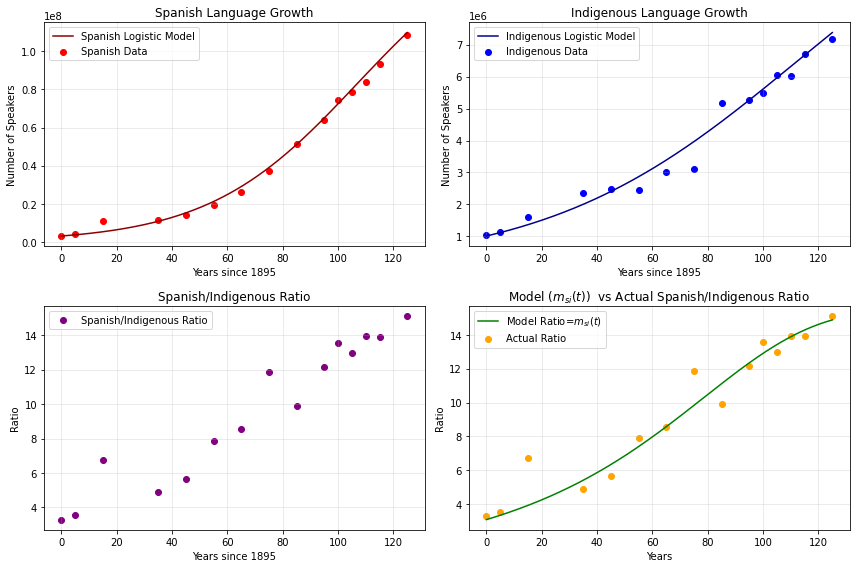

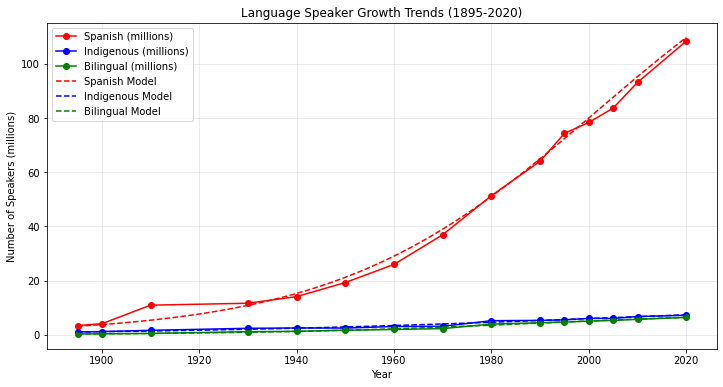

Future Projections:
Year 2020: Spanish: 109774994, Indigenous: 7376028, Ratio: 14.88
Year 2030: Spanish: 122618551, Indigenous: 8058854, Ratio: 15.22
Year 2040: Spanish: 133399233, Indigenous: 8705612, Ratio: 15.32
Year 2050: Spanish: 142024328, Indigenous: 9304899, Ratio: 15.26
Year 2060: Spanish: 148663692, Indigenous: 9849006, Ratio: 15.09
Year 2070: Spanish: 153624298, Indigenous: 10333952, Ratio: 14.87
Year 2080: Spanish: 157248628, Indigenous: 10759092, Ratio: 14.62
Year 2090: Spanish: 159853589, Indigenous: 11126440, Ratio: 14.37
Year 2100: Spanish: 161703905, Indigenous: 11439897, Ratio: 14.14
Year 2110: Spanish: 163007195, Indigenous: 11704523, Ratio: 13.93
Year 2120: Spanish: 163919759, Indigenous: 11925912, Ratio: 13.74
Year 2130: Spanish: 164556088, Indigenous: 12109731, Ratio: 13.59
Year 2140: Spanish: 164998514, Indigenous: 12261400, Ratio: 13.46
Year 2150: Spanish: 165305505, Indigenous: 12385893, Ratio: 13.35
Year 2160: Spanish: 165518222, Indigenous: 12487644, Ratio: 1

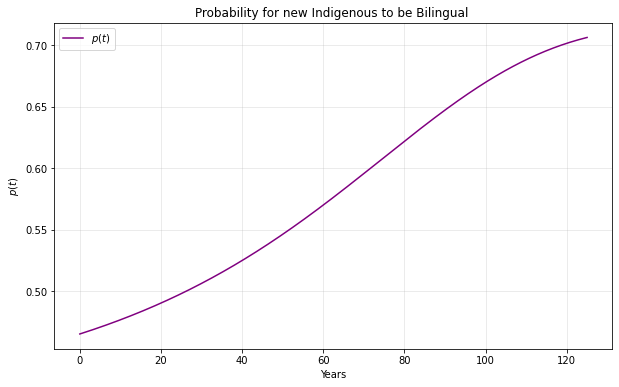

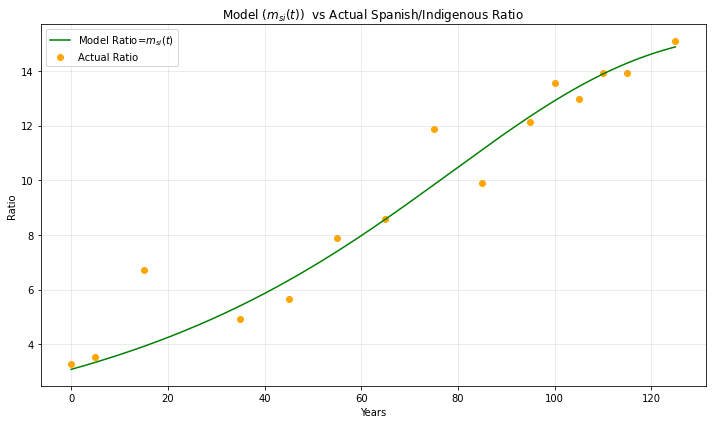

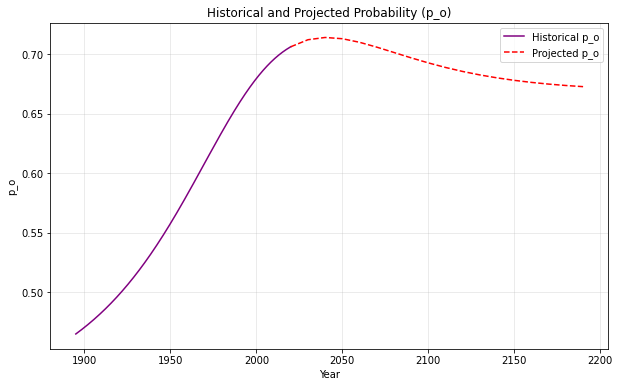


Future p_o Projections:
Year 2020: Ratio: 14.88, p_o: 0.7063
Year 2030: Ratio: 15.22, p_o: 0.7122
Year 2040: Ratio: 15.32, p_o: 0.7141
Year 2050: Ratio: 15.26, p_o: 0.7131
Year 2060: Ratio: 15.09, p_o: 0.7101
Year 2070: Ratio: 14.87, p_o: 0.7060
Year 2080: Ratio: 14.62, p_o: 0.7015
Year 2090: Ratio: 14.37, p_o: 0.6970
Year 2100: Ratio: 14.14, p_o: 0.6928
Year 2110: Ratio: 13.93, p_o: 0.6889
Year 2120: Ratio: 13.74, p_o: 0.6856
Year 2130: Ratio: 13.59, p_o: 0.6827
Year 2140: Ratio: 13.46, p_o: 0.6802
Year 2150: Ratio: 13.35, p_o: 0.6781
Year 2160: Ratio: 13.25, p_o: 0.6764
Year 2170: Ratio: 13.18, p_o: 0.6749
Year 2180: Ratio: 13.12, p_o: 0.6738
Year 2190: Ratio: 13.07, p_o: 0.6728


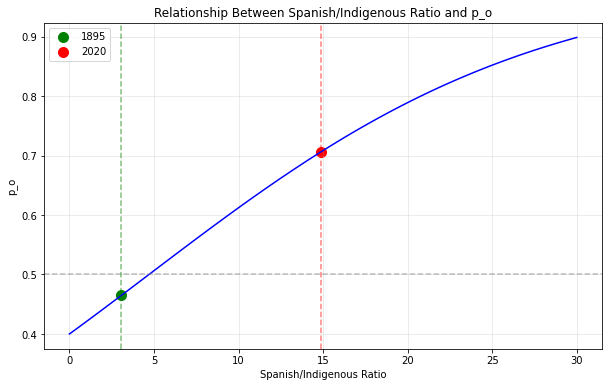

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Create dataframe from the provided data
data = {
    'Year': [1895, 1900, 1910, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005, 2010, 2020],
    'Spanish': [3394259.0, 4054539.0, 10907376.0, 11624643.0, 14080954.0, 19272593.0, 25968301.0, 36946313.0, 51353211.0, 64104668.0, 74378670.0, 78381411.0, 83704299.0, 93203961.0, 108408500.0],
    'Indigenous': [1030670.0, 1144766.0, 1619825.0, 2370324.0, 2490909.0, 2447615.0, 3030254.0, 3111415.0, 5181038.0, 5282347.0, 5483555.0, 6044547.0, 6011202.0, 6695228.0, 7177185.0],
    'Bilingual': [297977.0, 337528.0, 478232.0, 1126925.0, 1253891.0, 1652544.0, 1925299.0, 2251561.0, 3932514.0, 4411818.0, 4671553.0, 5022373.0, 5274418.0, 5676791.0, 6383553.0]
}
df = pd.DataFrame(data)

# Define logistic function
def logistic_function(t, K, r, N0):
    """
    Logistic growth function
    
    Parameters:
    t (array-like): Time points
    K (float): Carrying capacity
    r (float): Growth rate
    N0 (float): Initial value
    
    Returns:
    array-like: values
    """
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Parameters provided
# For Bilingual
N0_bilingual = 272030  # Initial value
K_bilingual = 8615939  # Carrying capacity
r_bilingual = 0.036    # Growth rate

# For Indigenous
N0_indigenous = 1012848  # Initial value
K_indigenous = 12918933  # Carrying capacity
r_indigenous = 0.022     # Growth rate

# For Spanish
N0_spanish = 3117878    # Initial value
K_spanish = 165995301   # Carrying capacity
r_spanish = 0.037       # Growth rate

# Convert years to time points starting from 0 (1895 = 0)
base_year = 1895
df['t'] = df['Year'] - base_year

# Create time points for smooth curves
t_smooth = np.linspace(0, 2020-base_year, 500)

# 1) Plot logistic of Spanish from the Spanish data in df
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(df['t'], df['Spanish'], color='red', label='Spanish Data')
plt.plot(t_smooth, logistic_function(t_smooth, K_spanish, r_spanish, N0_spanish), 
         color='darkred', label='Spanish Logistic Model')
plt.title('Spanish Language Growth')
plt.xlabel('Years since 1895')
plt.ylabel('Number of Speakers')
plt.legend()
plt.grid(True, alpha=0.3)

# 2) Plot logistic of Indigenous from the Indigenous data in df
plt.subplot(2, 2, 2)
plt.scatter(df['t'], df['Indigenous'], color='blue', label='Indigenous Data')
plt.plot(t_smooth, logistic_function(t_smooth, K_indigenous, r_indigenous, N0_indigenous), 
         color='darkblue', label='Indigenous Logistic Model')
plt.title('Indigenous Language Growth')
plt.xlabel('Years since 1895')
plt.ylabel('Number of Speakers')
plt.legend()
plt.grid(True, alpha=0.3)

# 3) Plot and Fit Spanish/Indigenous from the df
plt.subplot(2, 2, 3)
# Calculate ratio
df['Spanish_Indigenous_Ratio'] = df['Spanish'] / df['Indigenous']
plt.scatter(df['t'], df['Spanish_Indigenous_Ratio'], color='purple', label='Spanish/Indigenous Ratio')
plt.title('Spanish/Indigenous Ratio')
plt.xlabel('Years since 1895')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

# 4) Create a function that accepts parameters and returns the ratio
def ratio_function(t, N0_s, K_s, r_s, N0_ind, K_ind, r_ind):
    """
    Calculate the ratio of Spanish to Indigenous speakers based on logistic models
    """
    log_s = K_s / (1 + ((K_s - N0_s) / N0_s) * np.exp(-r_s * t))
    log_ind = K_ind / (1 + ((K_ind - N0_ind) / N0_ind) * np.exp(-r_ind * t))
    return log_s / log_ind

# 5) Plot metric (ratio based on logistic models)
plt.subplot(2, 2, 4)
ratio_values = ratio_function(t_smooth, N0_spanish, K_spanish, r_spanish, 
                              N0_indigenous, K_indigenous, r_indigenous)
plt.plot(t_smooth, ratio_values, color='green', label=r'Model Ratio=$m_{si}(t)$')

# 6) Validate metric vs Spanish/Indigenous
plt.scatter(df['t'], df['Spanish_Indigenous_Ratio'], color='orange', label='Actual Ratio')
plt.title(r'Model ($m_{si}(t)$)  vs Actual Spanish/Indigenous Ratio')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Create a combined plot showing all three language trends
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Spanish']/1000000, 'ro-', label='Spanish (millions)')
plt.plot(df['Year'], df['Indigenous']/1000000, 'bo-', label='Indigenous (millions)')
plt.plot(df['Year'], df['Bilingual']/1000000, 'go-', label='Bilingual (millions)')

# Add logistic model curves
years_smooth = t_smooth + base_year
plt.plot(years_smooth, logistic_function(t_smooth, K_spanish, r_spanish, N0_spanish)/1000000, 
         'r--', label='Spanish Model')
plt.plot(years_smooth, logistic_function(t_smooth, K_indigenous, r_indigenous, N0_indigenous)/1000000, 
         'b--', label='Indigenous Model')
plt.plot(years_smooth, logistic_function(t_smooth, K_bilingual, r_bilingual, N0_bilingual)/1000000, 
         'g--', label='Bilingual Model')

plt.title('Language Speaker Growth Trends (1895-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Speakers (millions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate future projections
future_years = np.arange(2020-base_year, 2200-base_year, 10)
future_spanish = logistic_function(future_years, K_spanish, r_spanish, N0_spanish)
future_indigenous = logistic_function(future_years, K_indigenous, r_indigenous, N0_indigenous)
future_bilingual = logistic_function(future_years, K_bilingual, r_bilingual, N0_bilingual)
future_ratio = future_spanish / future_indigenous

print("Future Projections:")
for i, year in enumerate(future_years + base_year):
    print(f"Year {int(year)}: Spanish: {future_spanish[i]:.0f}, Indigenous: {future_indigenous[i]:.0f}, Ratio: {future_ratio[i]:.2f}")

# Create function for p_o based on ratio
def calculate_p(ratio, A=1.5, alpha=1/11.6):
    """
    Calculate p value based on ratio using sigmoid function
    p = 1/(1+A*exp(-alpha*ratio))
    """
    exp = np.exp(-alpha*ratio)
    den = 1 + A*exp
    return 1/den

# Calculate p values based on model ratio
p_values = calculate_p(ratio_values)

# Create new plot for p values
plt.figure(figsize=(10, 6))
plt.plot(t_smooth, p_values, color='purple', label=r'$p(t)$')
#plt.plot(years_smooth, 1-p_values, color='red', label='p_l')
plt.title('Probability for new Indigenous to be Bilingual ')
plt.xlabel('Years')
plt.ylabel(r'$p(t)$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig("Bilingual.jpg")
plt.show()

# 5) Plot metric (ratio based on logistic models)
plt.figure(figsize=(10, 6))
ratio_values = ratio_function(t_smooth, N0_spanish, K_spanish, r_spanish, 
                              N0_indigenous, K_indigenous, r_indigenous)
plt.plot(t_smooth, ratio_values, color='green', label=r'Model Ratio=$m_{si}(t)$')

# 6) Validate metric vs Spanish/Indigenous
plt.scatter(df['t'], df['Spanish_Indigenous_Ratio'], color='orange', label='Actual Ratio')
plt.title(r'Model ($m_{si}(t)$)  vs Actual Spanish/Indigenous Ratio')
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("A.jpg")
plt.show()

# Calculate p values for future projections
future_p_values = calculate_p(future_ratio)

# Create plot showing future p values
plt.figure(figsize=(10, 6))
future_years_actual = future_years + base_year
plt.plot(years_smooth, p_values, color='purple', label='Historical p_o')
plt.plot(future_years_actual, future_p_values, color='red', linestyle='--', label='Projected p_o')
plt.title('Historical and Projected Probability (p_o)')
plt.xlabel('Year')
plt.ylabel('p_o')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Print future p_o values
print("\nFuture p_o Projections:")
for i, year in enumerate(future_years + base_year):
    print(f"Year {int(year)}: Ratio: {future_ratio[i]:.2f}, p_o: {future_p_values[i]:.4f}")

# Plot showing relationship between ratio and p_o
plt.figure(figsize=(10, 6))
test_ratios = np.linspace(0, 30, 100)
test_p_values = calculate_p(test_ratios)
plt.plot(test_ratios, test_p_values, color='blue')
plt.scatter(ratio_values[0], p_values[0], color='green', label='1895', s=100)
plt.scatter(ratio_values[-1], p_values[-1], color='red', label='2020', s=100)
plt.title('Relationship Between Spanish/Indigenous Ratio and p_o')
plt.xlabel('Spanish/Indigenous Ratio')
plt.ylabel('p_o')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=ratio_values[0], color='green', linestyle='--', alpha=0.5)
plt.axvline(x=ratio_values[-1], color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Model Comparison for Predicting Bilingual Proportion:
1. Logistic:       p(m) = 1 / (1 + exp(-(-1.6557 + 0.2526 * m)))
   MSE: 0.00504724

2. Scaled Logistic: p(m) = 0.9696 / (1 + exp(-(-1.6988 + 0.2706 * m)))
   MSE: 0.00502658

3. Probit:        p(m) = Φ(-1.0024 + 0.1525 * m)
   MSE: 0.00509594

4. Power Function: p(m) = min(1, 0.1314 * m^0.7175)
   MSE: 0.00527912


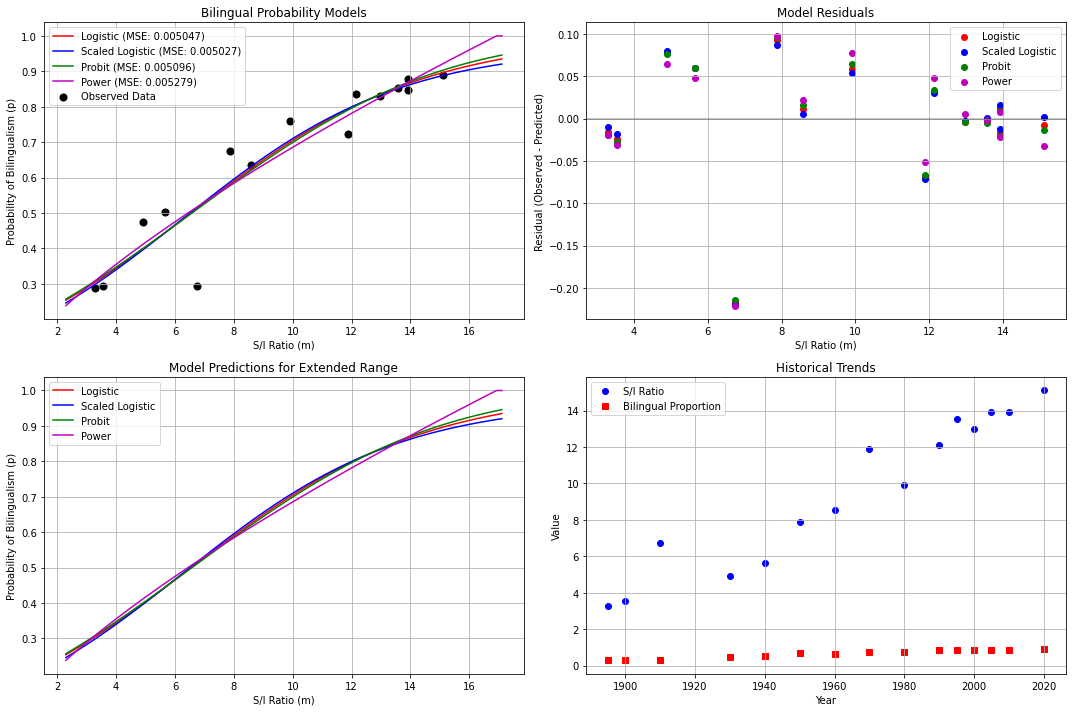


Binomial Distribution Example:
Using the scaled model: p(m) = 0.9696 / (1 + exp(-(-1.6988 + 0.2706 * m)))
For the year 2020 with S/I ratio = 15.10, probability of bilingualism p = 0.8881
In a sample of 20 Indigenous language speakers:
Probability of exactly 14 being bilingual: 0.0145 (1.45%)
Probability of exactly 15 being bilingual: 0.0459 (4.59%)
Probability of exactly 16 being bilingual: 0.1138 (11.38%)
Probability of exactly 17 being bilingual: 0.2125 (21.25%)
Probability of exactly 18 being bilingual: 0.2810 (28.10%)
Probability of exactly 19 being bilingual: 0.2347 (23.47%)
Probability of exactly 20 being bilingual: 0.0931 (9.31%)


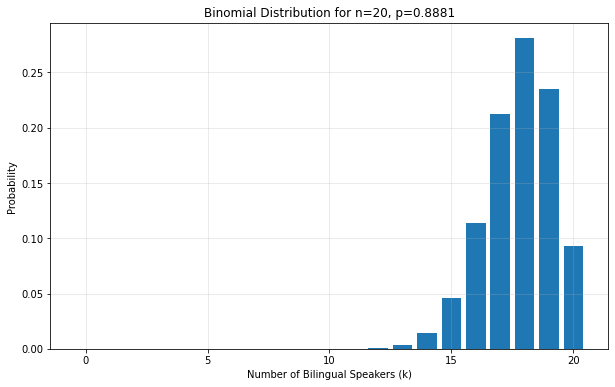


Summary of Observed and Predicted Values:
    Year  S/I Ratio  Observed Proportion  Logistic Model  \
0   1895     3.2933               0.2891          0.3049   
1   1900     3.5418               0.2948          0.3184   
2   1910     6.7337               0.2952          0.5113   
3   1930     4.9042               0.4754          0.3972   
4   1940     5.6529               0.5034          0.4433   
5   1950     7.8740               0.6752          0.5825   
6   1960     8.5697               0.6354          0.6245   
7   1970    11.8744               0.7236          0.7931   
8   1980     9.9118               0.7590          0.7001   
9   1990    12.1356               0.8352          0.8037   
10  1995    13.5640               0.8519          0.8545   
11  2000    12.9673               0.8309          0.8347   
12  2005    13.9247               0.8774          0.8654   
13  2010    13.9210               0.8479          0.8653   
14  2020    15.1046               0.8894          0.8965 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Your data
data = {
    'Year': [1895, 1900, 1910, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005, 2010, 2020],
    'Spanish': [3394259.0, 4054539.0, 10907376.0, 11624643.0, 14080954.0, 19272593.0, 25968301.0, 36946313.0, 51353211.0, 64104668.0, 74378670.0, 78381411.0, 83704299.0, 93203961.0, 108408500.0],
    'Indigenous': [1030670.0, 1144766.0, 1619825.0, 2370324.0, 2490909.0, 2447615.0, 3030254.0, 3111415.0, 5181038.0, 5282347.0, 5483555.0, 6044547.0, 6011202.0, 6695228.0, 7177185.0],
    'Bilingual': [297977.0, 337528.0, 478232.0, 1126925.0, 1253891.0, 1652544.0, 1925299.0, 2251561.0, 3932514.0, 4411818.0, 4671553.0, 5022373.0, 5274418.0, 5676791.0, 6383553.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate S/I ratio (m)
df['m'] = df['Spanish'] / df['Indigenous']

# Calculate proportion of Indigenous speakers who are bilingual (p)
df['p_observed'] = df['Bilingual'] / df['Indigenous']

# Define different probability models
def logistic(m, a, b):
    """Standard logistic function"""
    return 1 / (1 + np.exp(-(a + b * m)))

def scaled_logistic(m, a, b, p_max):
    """Scaled logistic function with maximum probability p_max"""
    return p_max / (1 + np.exp(-(a + b * m)))

def probit(m, a, b):
    """Probit model using normal CDF"""
    from scipy.stats import norm
    return norm.cdf(a + b * m)

def power_function(m, c, gamma):
    """Power function model"""
    return np.minimum(1, c * np.power(m, gamma))

# Fit models
# 1. Standard Logistic
params_logistic, cov_logistic = curve_fit(logistic, df['m'], df['p_observed'], p0=[-5, 0.5])
df['p_logistic'] = logistic(df['m'], *params_logistic)
mse_logistic = mean_squared_error(df['p_observed'], df['p_logistic'])

# 2. Scaled Logistic
params_scaled, cov_scaled = curve_fit(scaled_logistic, df['m'], df['p_observed'], p0=[-5, 0.5, 0.9])
df['p_scaled'] = scaled_logistic(df['m'], *params_scaled)
mse_scaled = mean_squared_error(df['p_observed'], df['p_scaled'])

# 3. Probit
params_probit, cov_probit = curve_fit(probit, df['m'], df['p_observed'], p0=[-5, 0.5])
df['p_probit'] = probit(df['m'], *params_probit)
mse_probit = mean_squared_error(df['p_observed'], df['p_probit'])

# 4. Power Function
params_power, cov_power = curve_fit(power_function, df['m'], df['p_observed'], p0=[0.3, 0.3])
df['p_power'] = power_function(df['m'], *params_power)
mse_power = mean_squared_error(df['p_observed'], df['p_power'])

# Print model parameters and performance
print("\nModel Comparison for Predicting Bilingual Proportion:")
print(f"1. Logistic:       p(m) = 1 / (1 + exp(-({params_logistic[0]:.4f} + {params_logistic[1]:.4f} * m)))")
print(f"   MSE: {mse_logistic:.8f}")

print(f"\n2. Scaled Logistic: p(m) = {params_scaled[2]:.4f} / (1 + exp(-({params_scaled[0]:.4f} + {params_scaled[1]:.4f} * m)))")
print(f"   MSE: {mse_scaled:.8f}")

print(f"\n3. Probit:        p(m) = Φ({params_probit[0]:.4f} + {params_probit[1]:.4f} * m)")
print(f"   MSE: {mse_probit:.8f}")

print(f"\n4. Power Function: p(m) = min(1, {params_power[0]:.4f} * m^{params_power[1]:.4f})")
print(f"   MSE: {mse_power:.8f}")

# Generate prediction curves for a wider range of m values
m_range = np.linspace(min(df['m']) - 1, max(df['m']) + 2, 1000)
p_logistic_curve = logistic(m_range, *params_logistic)
p_scaled_curve = scaled_logistic(m_range, *params_scaled)
p_probit_curve = probit(m_range, *params_probit)
p_power_curve = power_function(m_range, *params_power)

# Create visualization plots
plt.figure(figsize=(15, 10))

# Plot 1: Observed data and fitted models
plt.subplot(2, 2, 1)
plt.scatter(df['m'], df['p_observed'], color='black', s=50, label='Observed Data')
plt.plot(m_range, p_logistic_curve, 'r-', label=f'Logistic (MSE: {mse_logistic:.6f})')
plt.plot(m_range, p_scaled_curve, 'b-', label=f'Scaled Logistic (MSE: {mse_scaled:.6f})')
plt.plot(m_range, p_probit_curve, 'g-', label=f'Probit (MSE: {mse_probit:.6f})')
plt.plot(m_range, p_power_curve, 'm-', label=f'Power (MSE: {mse_power:.6f})')
plt.title('Bilingual Probability Models')
plt.xlabel('S/I Ratio (m)')
plt.ylabel('Probability of Bilingualism (p)')
plt.legend()
plt.grid(True)

# Plot 2: Residuals for each model
plt.subplot(2, 2, 2)
plt.scatter(df['m'], df['p_observed'] - df['p_logistic'], color='r', label='Logistic')
plt.scatter(df['m'], df['p_observed'] - df['p_scaled'], color='b', label='Scaled Logistic')
plt.scatter(df['m'], df['p_observed'] - df['p_probit'], color='g', label='Probit')
plt.scatter(df['m'], df['p_observed'] - df['p_power'], color='m', label='Power')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Model Residuals')
plt.xlabel('S/I Ratio (m)')
plt.ylabel('Residual (Observed - Predicted)')
plt.legend()
plt.grid(True)

# Plot 3: Model comparison for a wider range
plt.subplot(2, 2, 3)
plt.plot(m_range, p_logistic_curve, 'r-', label='Logistic')
plt.plot(m_range, p_scaled_curve, 'b-', label='Scaled Logistic')
plt.plot(m_range, p_probit_curve, 'g-', label='Probit')
plt.plot(m_range, p_power_curve, 'm-', label='Power')
plt.title('Model Predictions for Extended Range')
plt.xlabel('S/I Ratio (m)')
plt.ylabel('Probability of Bilingualism (p)')
plt.legend()
plt.grid(True)

# Plot 4: Historical trend of S/I ratio and bilingual proportion
plt.subplot(2, 2, 4)
plt.scatter(df['Year'], df['m'], color='blue', label='S/I Ratio', marker='o')
plt.scatter(df['Year'], df['p_observed'], color='red', label='Bilingual Proportion', marker='s')
plt.title('Historical Trends')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('bilingual_probability_models.png', dpi=300)
plt.show()

# Calculate binomial probabilities for example scenario
def binomial_prob(n, k, p):
    """Calculate binomial probability of k successes in n trials with probability p"""
    from scipy.stats import binom
    return binom.pmf(k, n, p)

# Example: Calculate probability of observing k bilingual speakers in a sample of n=20 Indigenous speakers
# for the most recent year (2020) using the best model
n_sample = 20
best_model = min([(mse_logistic, 'logistic'), (mse_scaled, 'scaled'), 
                 (mse_probit, 'probit'), (mse_power, 'power')])[1]

# Get the latest probability
if best_model == 'logistic':
    latest_p = df['p_logistic'].iloc[-1]
    model_formula = f"p(m) = 1 / (1 + exp(-({params_logistic[0]:.4f} + {params_logistic[1]:.4f} * m)))"
elif best_model == 'scaled':
    latest_p = df['p_scaled'].iloc[-1]
    model_formula = f"p(m) = {params_scaled[2]:.4f} / (1 + exp(-({params_scaled[0]:.4f} + {params_scaled[1]:.4f} * m)))"
elif best_model == 'probit':
    latest_p = df['p_probit'].iloc[-1]
    model_formula = f"p(m) = Φ({params_probit[0]:.4f} + {params_probit[1]:.4f} * m)"
else:
    latest_p = df['p_power'].iloc[-1]
    model_formula = f"p(m) = min(1, {params_power[0]:.4f} * m^{params_power[1]:.4f})"

# Calculate probabilities for different k values
k_values = np.arange(n_sample + 1)
probabilities = [binomial_prob(n_sample, k, latest_p) for k in k_values]

# Print results
print("\nBinomial Distribution Example:")
print(f"Using the {best_model} model: {model_formula}")
print(f"For the year 2020 with S/I ratio = {df['m'].iloc[-1]:.2f}, probability of bilingualism p = {latest_p:.4f}")
print(f"In a sample of {n_sample} Indigenous language speakers:")
for k, prob in zip(k_values, probabilities):
    if prob > 0.01:  # Only show probabilities > 1%
        print(f"Probability of exactly {k} being bilingual: {prob:.4f} ({prob*100:.2f}%)")

# Plot binomial distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities)
plt.title(f'Binomial Distribution for n={n_sample}, p={latest_p:.4f}')
plt.xlabel('Number of Bilingual Speakers (k)')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.savefig('binomial_distribution.png', dpi=300)
plt.show()

# Create a summary DataFrame with observed and predicted values
summary = df[['Year', 'm', 'p_observed', 'p_logistic', 'p_scaled', 'p_probit', 'p_power']].copy()
summary.columns = ['Year', 'S/I Ratio', 'Observed Proportion', 'Logistic Model', 
                   'Scaled Logistic Model', 'Probit Model', 'Power Model']
print("\nSummary of Observed and Predicted Values:")
print(summary.round(4))